# Loan Detection System

In [1]:
#Importing all the libraries needed
import numpy as np 
import pandas as pd
# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# data spliting libraries
from sklearn.model_selection import train_test_split
# model fitting in machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# model matrix  showing library
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# ignore warnings libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read_csv file and show data frame
data=pd.read_csv("Loan_default.csv")

# Reading and Understanding the Dataset

In [3]:
data.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [4]:
# checking the shape of data frame 
data.shape

(255347, 18)

In [5]:
# create copy of datafrme
df=data.copy()

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
# finding na value from data
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [8]:
# find duplicate values from data
df.duplicated().sum()

0

In [9]:
# numerical stats
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


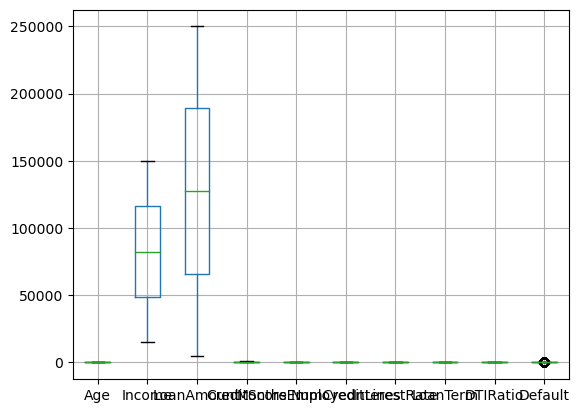

In [10]:
# find outliers from data by using boxplot
df.boxplot()
plt.show()

In [11]:
# describe data columns all columns
df.describe(include="all")

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347,255347,255347,255347,255347,255347,255347,255347.000000
unique,255347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,5,2,NaN
top,I38PQUQS96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64366,64161,85302,127677,127742,51298,127701,NaN
mean,NaN,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116128
std,NaN,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320379
min,NaN,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [12]:
# drop unwanted column from dataframe
df=df.drop(["LoanID","Education","EmploymentType","MaritalStatus","HasDependents","HasCoSigner"],axis=1)

In [13]:
# dataframe show first five row 
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,LoanPurpose,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Yes,Other,0
1,69,50432,124440,458,15,1,4.81,60,0.68,No,Other,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Yes,Auto,1
3,32,31713,44799,743,0,3,7.07,24,0.23,No,Business,0
4,60,20437,9139,633,8,4,6.51,48,0.73,No,Auto,0


In [14]:
# chaeking Dataframe shape
df.shape

(255347, 12)

In [15]:
# finding incorrect values by using unique and value_counts function
df["Age"].unique()

array([56, 69, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61,
       47, 55, 50, 29, 42, 66, 44, 59, 45, 33, 64, 68, 54, 24, 26, 35, 21,
       31, 67, 43, 37, 52, 34, 23, 51, 27, 48, 65, 62, 58, 18, 22, 30, 49,
       63], dtype=int64)

In [16]:
df["NumCreditLines"].value_counts()

2    64130
3    63834
4    63829
1    63554
Name: NumCreditLines, dtype: int64

In [17]:
df["LoanTerm"].value_counts()

48    51166
60    51154
36    51061
24    51009
12    50957
Name: LoanTerm, dtype: int64

In [18]:
df["HasMortgage"].value_counts()

Yes    127677
No     127670
Name: HasMortgage, dtype: int64

In [19]:
df["LoanPurpose"].value_counts()

Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: LoanPurpose, dtype: int64

In [20]:
df["Default"].value_counts()

0    225694
1     29653
Name: Default, dtype: int64

# Data Visualizationl

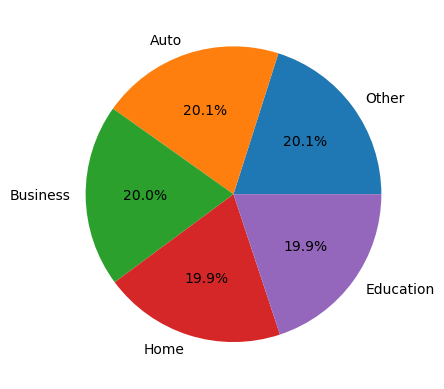

In [21]:
# Different categories in pie chart
plt.pie(df["LoanPurpose"].value_counts(),labels=df["LoanPurpose"].unique(),autopct="%1.1f%%")
plt.show()

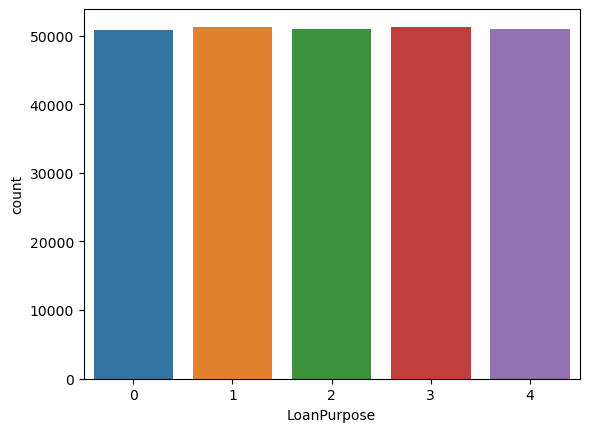

In [57]:
# understand categorical columns
# use barchart to display the frequency or count of each category in each coulmn
sns.countplot(x="LoanPurpose",data=df)
plt.show()

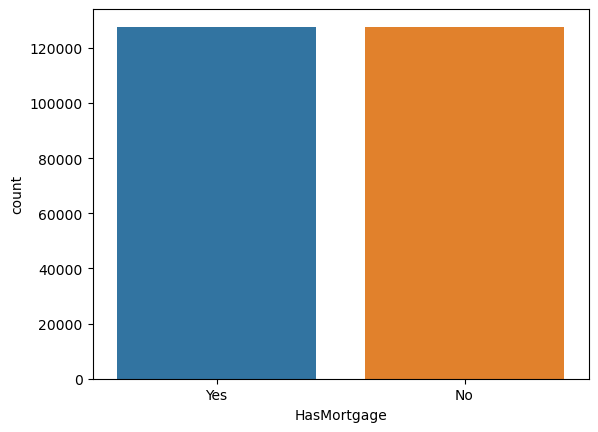

In [22]:
# Show in data Frame "HasMortgage" column counnts
sns.countplot(data=df,x="HasMortgage")
plt.show()

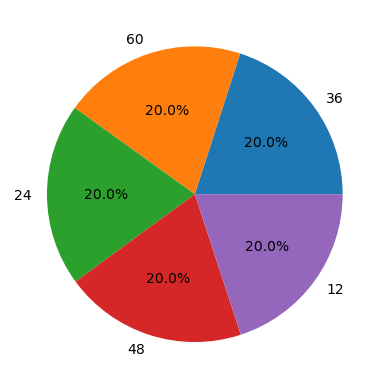

In [23]:
# Shwo in dataframe "LoanTerm" catagerey visulaication 
plt.pie(df["LoanTerm"].value_counts(),labels=df["LoanTerm"].unique(),autopct="%1.1f%%")
plt.show()

In [24]:
# Import label encoder for converting categorical columns into numeric values
# from sklearn.preprocessing import LabelEncoder

In [25]:
label_encoder=LabelEncoder()

In [26]:
df["HasMortgage"]=label_encoder.fit_transform(df["HasMortgage"])
df["LoanPurpose"]=label_encoder.fit_transform(df["LoanPurpose"])

In [27]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,LoanPurpose,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,4,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0,4,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,0,0


In [28]:
# Import standard scalar to standardize values of dataframe
# from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()

In [30]:
standardize=scaler.fit_transform(df)

In [31]:
# Assign the values to x and y
x=df.drop("Default",axis=1)
y=df["Default"]

In [32]:
# split the data into train,test,split
# from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=25)

# model fitting in machine learning

In [34]:
# using linerar model in to import LogisticRegrassion 
# from sklearn.linear_model import LogisticRegression

In [35]:
model=LogisticRegression()

In [36]:
# use by logistic regrassion
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
# predicaton by test data train data
test_pred=model.predict(x_test)
train_pred=model.predict(x_train)

In [38]:
# from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

predicaton by testing and traning accuracy score,classification_report,confusion_matrix

In [39]:
testing_accuracy=accuracy_score(test_pred,y_test)
testing_accuracy

0.8837351379294139

In [40]:
training_accuracy=accuracy_score(train_pred,y_train)
training_accuracy

0.8842775834160096

In [41]:
classification_report(test_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.88      0.94     63792\n           1       0.00      0.64      0.01        45\n\n    accuracy                           0.88     63837\n   macro avg       0.50      0.76      0.47     63837\nweighted avg       1.00      0.88      0.94     63837\n'

In [42]:
classification_report(train_pred,y_train)

'              precision    recall  f1-score   support\n\n           0       1.00      0.88      0.94    191384\n           1       0.00      0.72      0.01       126\n\n    accuracy                           0.88    191510\n   macro avg       0.50      0.80      0.47    191510\nweighted avg       1.00      0.88      0.94    191510\n'

In [43]:
confusion_matrix(test_pred,y_test)

array([[56386,  7406],
       [   16,    29]], dtype=int64)

In [44]:
confusion_matrix(train_pred,y_train)

array([[169257,  22127],
       [    35,     91]], dtype=int64)

In [45]:
# using ensemble model in to import RandomForestClassifier 
# from sklearn.ensemble import RandomForestClassifier

In [46]:
model1=RandomForestClassifier()

In [47]:
model1.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
test_pred1=model1.predict(x_test)
train_pred1=model1.predict(x_train)

In [49]:
# from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

predicaton by testing and traning accuracy score,classification_report,confusion_matrix

In [50]:
testing_accuracy=accuracy_score(test_pred1,y_test)
testing_accuracy

0.8845497125491486

In [51]:
traning_accurecy=accuracy_score(train_pred1,y_train)
traning_accurecy

0.9999791133622266

In [52]:
confusion_matrix(test_pred1,y_test)

array([[56096,  7064],
       [  306,   371]], dtype=int64)

In [53]:
confusion_matrix(train_pred1,y_train)

array([[169292,      4],
       [     0,  22214]], dtype=int64)

In [54]:
testing=classification_report(test_pred1,y_test)
testing

'              precision    recall  f1-score   support\n\n           0       0.99      0.89      0.94     63160\n           1       0.05      0.55      0.09       677\n\n    accuracy                           0.88     63837\n   macro avg       0.52      0.72      0.51     63837\nweighted avg       0.98      0.88      0.93     63837\n'

In [55]:
traning=classification_report(train_pred1,y_train)
traning

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    169296\n           1       1.00      1.00      1.00     22214\n\n    accuracy                           1.00    191510\n   macro avg       1.00      1.00      1.00    191510\nweighted avg       1.00      1.00      1.00    191510\n'

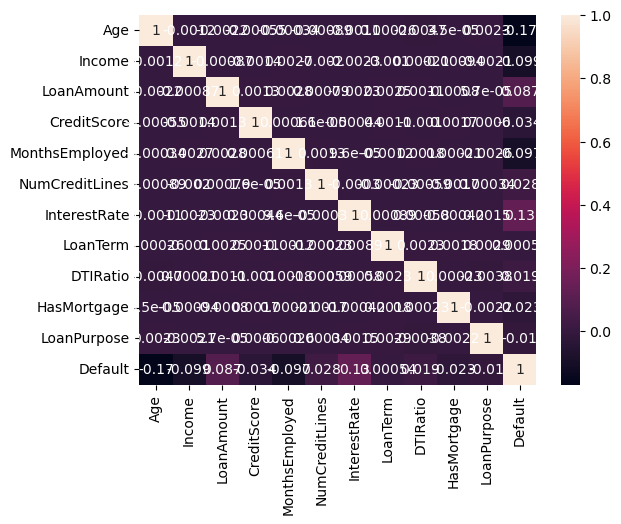

In [58]:
# visualize correlation matrix of numerical variables
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()